In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city=pd.read_csv(city_data_to_load)
ride=pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined = pd.merge(city, ride, how = 'outer', on='city')
# Display the data table for preview
combined.head(10)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


## Bubble Plot of Ride Sharing Data

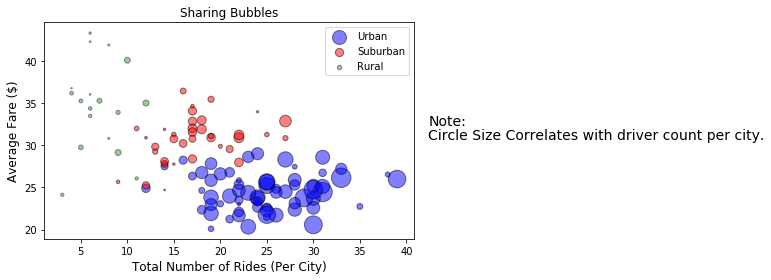

In [10]:
# Obtain the x and y coordinates for each of the three city types
urban = combined.loc[combined['type'] == 'Urban']
suburban = combined.loc[combined['type'] == 'Suburban']
rural = combined.loc[combined['type'] == 'Rural']
rural.head(2)
fig, ax = plt.subplots(figsize=(6,4))

# Groupby cities and get count number of rides for each
urban_city_count = urban.groupby(['city'])[["ride_id"]].count()
suburban_city_count = suburban.groupby(['city'])[["ride_id"]].count()
rural_city_count = rural.groupby(['city'])[["ride_id"]].count()

# Groupby cities and get caverage cost
urban_city_mean = urban.groupby(['city'])[["fare"]].mean()
suburban_city_mean = suburban.groupby(['city'])[["fare"]].mean()
rural_city_mean = rural.groupby(['city'])[["fare"]].mean()

# Get drivercount per city
urban_city_driver_count = urban.groupby(['city'])[["driver_count"]].sum()
suburban_city_driver_count = suburban.groupby(['city'])[["driver_count"]].sum()
rural_city_driver_count = rural.groupby(['city'])[["driver_count"]].sum()


# Build the scatter plots for each city types
urban = plt.scatter(urban_city_count, urban_city_mean, marker="o", facecolors="blue", edgecolors="black",s=urban_city_driver_count['driver_count']/6, alpha=0.5, label="Urban")
suburban = plt.scatter(suburban_city_count, suburban_city_mean, marker="o", facecolors="red", edgecolors="black",s=suburban_city_driver_count['driver_count']/5, alpha=0.5, label="Suburban")
rural =plt.scatter(rural_city_count, rural_city_mean, marker="o", facecolors="green", edgecolors="black",s=rural_city_driver_count['driver_count']/2, alpha=0.4, label="Rural")

# Axis, legend- grid formatting,etc
ax.set_xlabel("Total Number of Rides (Per City)", fontsize=12)
ax.set_ylabel("Average Fare ($)", fontsize=12)

plt.legend(scatterpoints= 1)
plt.gcf().text(1., 0.55, 'Note:', fontsize=14)
plt.gcf().text(1., 0.5, 'Circle Size Correlates with driver count per city.', fontsize=14)
plt.title('Sharing Bubbles')
plt.tight_layout()
plt.grid

# Save Figure
plt.savefig('Sharing Bubbles.jpg')
plt.show()


In [4]:
Total_drivers = combined['driver_count'].sum()

Total_drivers


68709

## Total Fares by City Type

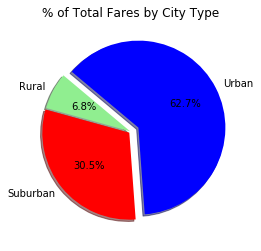

In [5]:
# Sum up all the fare measures - total and by city type %
total_fare = combined['fare'].sum()
Fare_by_city_type = (combined.groupby(['type'])[["fare"]].sum()/total_fare)*100


# Build Pie chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = Fare_by_city_type['fare']

# The colors of each section of the pie chart
colors = ["lightgreen", "red", "blue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.008, 0.02, 0.1)
plt.title('% of Total Fares by City Type')

# Show plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140);
plt.savefig('Total Fares by City.jpg')


## Total Rides by City Type

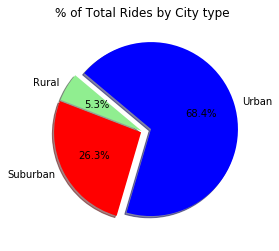

In [6]:
# Total rides by city type
Total_rides = combined['ride_id'].count()
ride_count_by_city_type = (combined.groupby(['type'])[["ride_id"]].count()/Total_rides)*100

# Build Pie chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = ride_count_by_city_type['ride_id']

# The colors of each section of the pie chart
colors = ["lightgreen", "red", "blue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.010, 0.02, 0.1)
plt.title('% of Total Rides by City type')

# Show plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140);
plt.savefig('Total Rides.jpg')

## Total Drivers by City Type

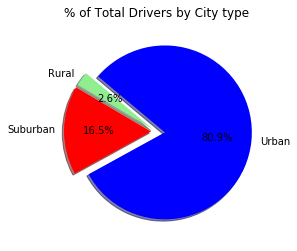

In [7]:
# Calculate Driver Percents
total_drivers = combined['driver_count'].sum()
combined_drop = combined.drop_duplicates(subset = ['city', 'driver_count'], keep = 'first')
drivers_count_city_type = combined_drop.groupby(['type'])[["driver_count"]].sum()

# Build Pie Charts

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = drivers_count_city_type['driver_count']

# The colors of each section of the pie chart
colors = ["lightgreen", "red", "blue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.05, 0.06, 0.1)
plt.title('% of Total Drivers by City type')
# Show plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140);
plt.savefig('Total Drivers.jpg')


,driver_count
type,
Rural,0.781557
Suburban,12.472893
Urban,86.745550
